# Predicting TPSA of Chemical Compounds

Topological Polar Surface Area is important for understanding how a compound will behave in the body. Usually a TPSA of less than 140 is required for the compound to cross the cell membrane. Usually a TPSA of less than 90 is required for the compound to cross the blood brain barrier.

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [61]:
pd_df = pd.read_csv('../input/train_folds.csv')
label = 'TPSA'
pd_df = pd_df.drop(columns='label')

In [62]:
to_scale = pd_df.drop(columns=['kfold','toxic', 'FormalCharge'])
scaler = StandardScaler()
scaled_values  = scaler.fit_transform(to_scale)
scaled_df = pd.DataFrame(scaled_values, columns = to_scale.columns)
final_df = pd_df[['kfold', 'toxic', 'FormalCharge']].join(scaled_df)

In [63]:
def scale_data(df):

    to_scale = df.drop(columns=['kfold','toxic', 'FormalCharge'])
    scaler = StandardScaler()
    scaled_values  = scaler.fit_transform(to_scale)
    scaled_df = pd.DataFrame(scaled_values, columns = to_scale.columns)
    final_df = df[['kfold', 'toxic', 'FormalCharge']].join(scaled_df)

    return final_df

In [64]:
scaled_df = scale_data(pd_df)

In [65]:
df_train = scaled_df[scaled_df['kfold']!= 0]
df_valid = scaled_df[scaled_df['kfold']==0]

In [66]:
X_train = df_train.drop(label, axis=1).values
y_train = df_train[label].values

X_valid = df_valid.drop(label, axis=1).values
y_valid = df_valid[label].values

#reg_model = model_dispatcher.models[model]
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

y_preds = reg_model.predict(X_valid)

mse = metrics.mean_squared_error(y_valid, y_preds)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_valid, y_preds)

In [69]:
print(r2, mse, rmse)

0.9820363318277275 0.015867033336795063 0.12596441297761468


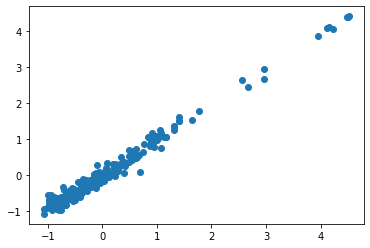

In [68]:
plt.scatter(y_valid, y_preds)
plt.show()